# Deep Determenistic Uncertainty

В этом ноутбуки представлены результаты реализации метода [Deep Determenisic Uncertainty](https://arxiv.org/pdf/2102.11582.pdf) на датасете [отзывов о различных приложениях](https://huggingface.co/datasets/app_reviews) с таргетом 1, если отзыв имеет звезду 5, и 0 иначе.

Идея заключается в применение GDA (Gaussian Discriminant Analysis) к выходу сверточного слоя для оценки вероятности некоторого наблюдения. Главное предположение - чем меньше эта вероятность, тем меньше качество модели.

In [1]:
#!g2.mig
%load_ext autoreload
%autoreload 2

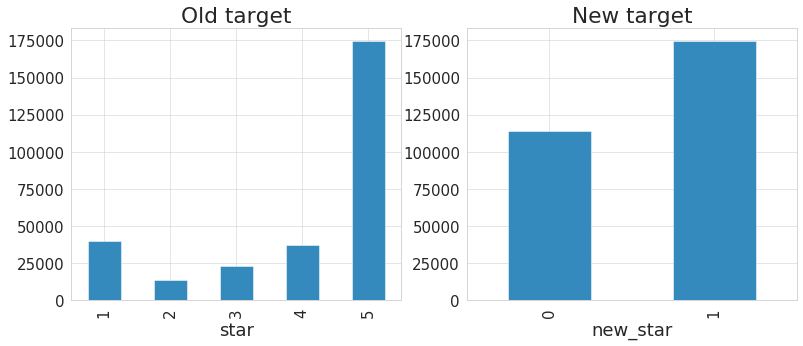

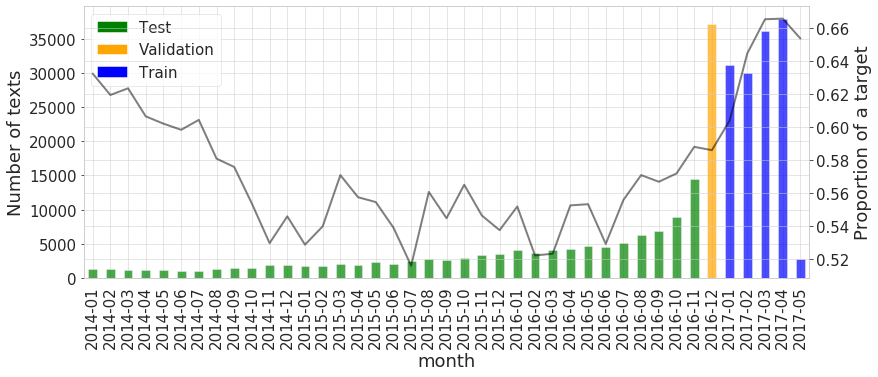

In [5]:
#!g2.mig
from datasets import load_dataset
from scripts.preprocessing import process, plot_data
from IPython.display import clear_output
import torch
from torch import nn
from torch.optim import Adam, SGD
from scripts.train import train 
from scripts.gda import GDA
from torch.utils.data import DataLoader
from scripts.dataset import TextDataset
from tqdm.notebook import tqdm
from scripts.test import test
import seaborn as sns
from scripts.test import test
import matplotlib.pyplot as plt
import pandas as pd

dataset = load_dataset("app_reviews")['train']
processed_dataset = process(dataset)
test_set = TextDataset(processed_dataset, 'test')
test_loader = DataLoader(test_set, batch_size=1000, shuffle=False)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

clear_output()

plot_data(dataset)

## RNN

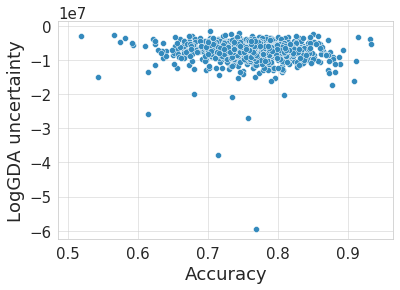

In [10]:
#!g2.mig
MODEL_NAME = 'rnn'

gda = GDA(MODEL_NAME)
gda.fit(processed_dataset)
model = gda.model
tmp = test(model.to(device), gda,test_loader)
clear_output()

tmp['Accuracy'] = (tmp['prediction'] == tmp['target']).astype('int')
pivot_rnn = pd.pivot_table(tmp, values = ['Accuracy','LogGDA uncertainty'], index = 'date')
sns.scatterplot(pivot_rnn, x='Accuracy', y = 'LogGDA uncertainty')

## LSTM


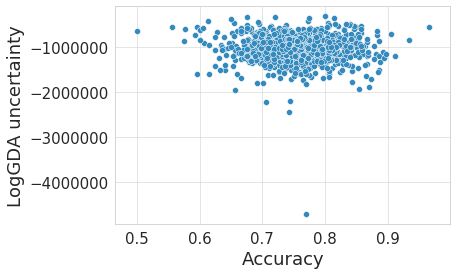

In [12]:
#!g2.mig
MODEL_NAME = 'lstm'

gda = GDA(MODEL_NAME)
gda.fit(processed_dataset)
model = gda.model
tmp = test(model.to(device), gda,test_loader)

clear_output()
tmp['Accuracy'] = (tmp['prediction'] == tmp['target']).astype('int')
pivot_lstm = pd.pivot_table(tmp, values = ['Accuracy','LogGDA uncertainty'], index = 'date')
sns.scatterplot(pivot_lstm, x='Accuracy', y='LogGDA uncertainty')

## GRU


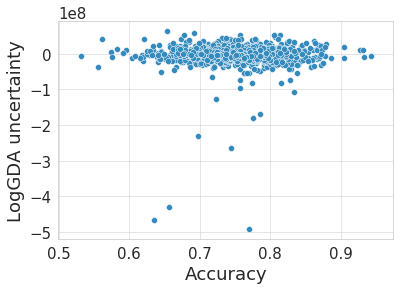

In [15]:
#!g2.mig
MODEL_NAME = 'gru'

gda = GDA(MODEL_NAME)
gda.fit(processed_dataset)
model = gda.model
tmp = test(model.to(device), gda,test_loader)

clear_output()
tmp['Accuracy'] = (tmp['prediction'] == tmp['target']).astype('int')
pivot_gru = pd.pivot_table(tmp, values = ['Accuracy','LogGDA uncertainty'], index = 'date')
sns.scatterplot(pivot_gru, x='Accuracy', y = 'LogGDA uncertainty')